MNIST HANDWRITTEN DIGIT CLASSIFICATION USING DEEP LEARNING(NEURAL NETWORK)

Importing dependencies

In [ ]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 #CV->Computer Vision
from PIL import Image
from google.colab.patches import cv2_imshow
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
tf.random.set_seed(3)

Loading MNIST data from keras.datasets

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
#shape of the numpy arrays
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


Training Data= 60,000 images
Testing Data= 10,000 images

Image Dimension=> 28*28
Grayscale Images=> 1 channel

In [ ]:
#printing the 100th image
print(X_train[100])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 25

In [ ]:
print(X_train[100].shape)

(28, 28)


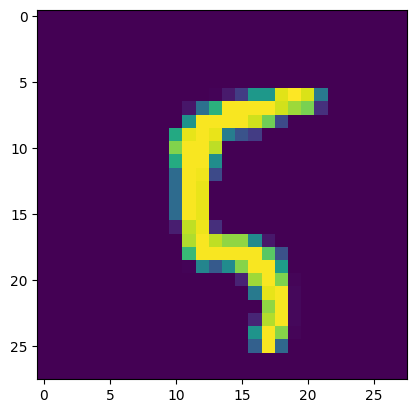

5


In [ ]:
#displaying the image

plt.imshow(X_train[100])
plt.show()

#printing the corresponding label
print(Y_train[100])

In [ ]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

#we can use these labels as such or also apply one hot encoding

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All the images should be of equal dimension to put them in the same numpy array

In [ ]:
#scaling the images(Normalisation)

X_train=X_train/255
X_test=X_test/255


In [ ]:
#printing the 100th image

print(X_train[100])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

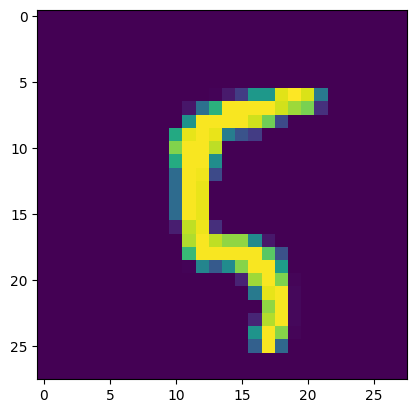

In [ ]:
#this won't change the image

plt.imshow(X_train[100])
plt.show()

Building the Neural Network

In [ ]:
#setting up layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

#1st layer ->flattens 2D array and mention the dimension of input image
#last layer is the output layer-> we have 10 classes of outputs so we need to have 10 neurons

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compile the Neural Network

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Training the Neural Network

In [ ]:
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8837 - loss: 0.4023
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9687 - loss: 0.1033
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9795 - loss: 0.0685
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9850 - loss: 0.0489
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9892 - loss: 0.0367
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9895 - loss: 0.0317
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9906 - loss: 0.0291
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9929 - loss: 0.0216
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9933 - loss: 0.0195
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9937 - loss: 0.0182
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9943 - loss: 0.0175
Epoch 12/20
1875/1875 ━━━━━

Training data accuracy=99.67%

Accuracy on Test Data

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9760 - loss: 0.1491
Test Loss: 0.11419747024774551
Test Accuracy: 0.9805999994277954


Test data accuracy=97.98%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


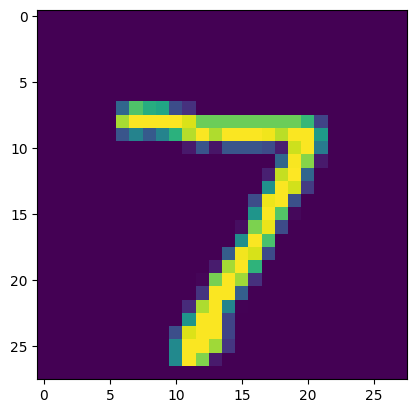

In [ ]:
#first data point in X_test

plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred=model.predict(X_test)
print(Y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)


In [ ]:
print(Y_pred[0])

[2.0239331e-06 3.2859427e-04 2.5795440e-08 1.2981842e-02 3.1314739e-06
 1.2608403e-06 4.2947514e-15 1.0000000e+00 4.1844550e-07 8.8325787e-01]


model.predict() gives the prediction probability to class label

In [ ]:
#converting prediction probabilities to class label

label_for_first_image=np.argmax(Y_pred[0])
print(label_for_first_image)

7


Hence, model predicted the number correctly.

In [ ]:
#converting prediction probabilities to class label for all data points
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 8, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 8, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(Y_pred)

[[2.02393312e-06 3.28594266e-04 2.57954405e-08 ... 1.00000000e+00
  4.18445495e-07 8.83257866e-01]
 [6.16479853e-11 9.56988335e-01 1.00000000e+00 ... 4.14303173e-07
  4.05397486e-06 6.43153109e-17]
 [7.49237616e-10 1.00000000e+00 3.63686564e-03 ... 6.65239466e-04
  6.98253587e-02 5.09081168e-08]
 ...
 [9.09161158e-21 2.29146517e-05 1.08840412e-16 ... 2.67464537e-02
  3.45126927e-09 9.88806367e-01]
 [1.31706018e-11 1.65214942e-07 8.55274070e-15 ... 4.76971414e-11
  9.90301311e-01 1.02528695e-12]
 [3.18608538e-04 1.04592420e-11 1.06492655e-08 ... 3.90641633e-24
  1.78060904e-01 6.49221050e-08]]


Y_test --> true labels

y_pred_labels --> predicted by neural network

Confusion Matrix

In [ ]:
conf_mat=confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 966    1    0    1    1    3    3    0    1    4]
 [   0 1132    1    0    0    0    2    0    0    0]
 [   1    1 1012    4    2    1    2    5    3    1]
 [   0    0    3  989    0    9    0    3    5    1]
 [   0    0    3    0  969    0    2    1    0    7]
 [   2    0    0   16    0  865    2    1    4    2]
 [   1    2    0    1    3   11  935    1    4    0]
 [   4    1   11    0    2    0    1  995    3   11]
 [   1    1    3    6    2    7    1    2  944    7]
 [   0    2    0    1    8    2    1    4    5  986]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

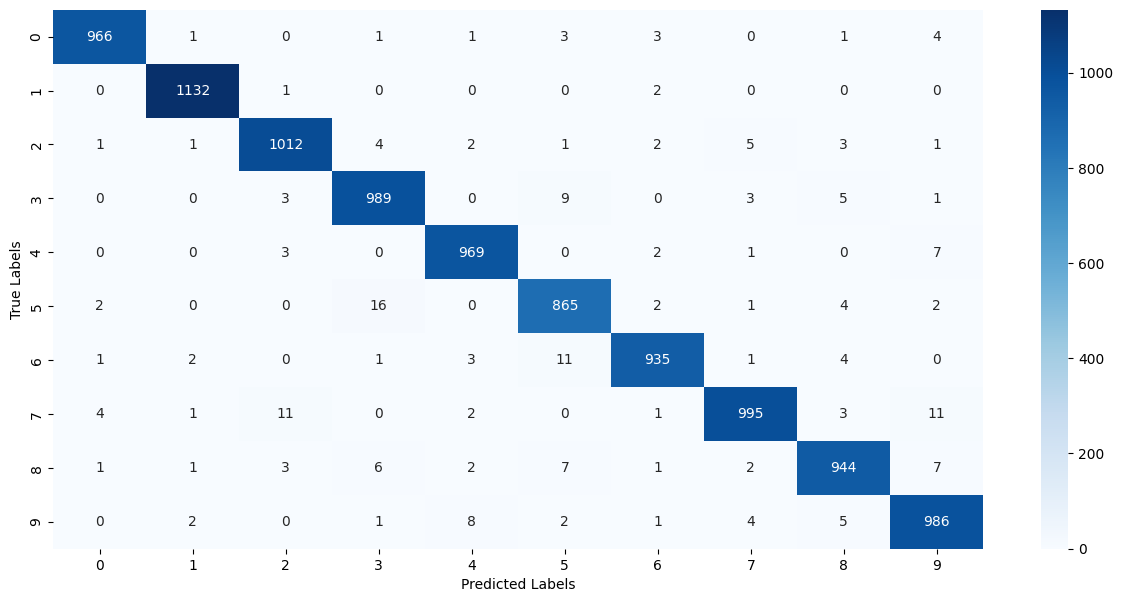

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In this matrix

Diagonal--> correct prediction of the true labels

m[i][j] are the number of ith true label predicted as jth predicted label.

Building a predictive system

In [ ]:
input_image_path='/content/MNIST_digit.png'

Image Processing

In [ ]:
!pip install opencv-python
import cv2
input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

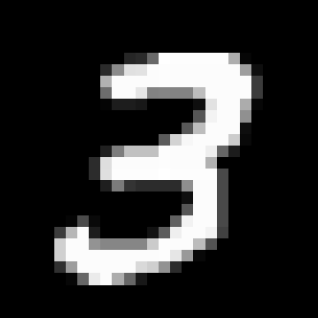

In [ ]:
from google.colab.patches import cv2_imshow # Importing cv2_imshow
cv2_imshow(input_image)

In [ ]:
shape=input_image.shape
print(shape)

(318, 318, 3)


Convert image to a gray scale image and then change its dimensions

In [ ]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

In [ ]:
grayscale.shape

(318, 318)

In [ ]:
#resizing the input_image
input_image_resize=cv2.resize(grayscale,(28,28))


In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
from google.colab.patches import cv2_imshow

In [52]:
input_image_resize=input_image_resize/255

In [54]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [56]:
input_prediction=model.predict(input_image_resize.reshape(1,28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [58]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

3


PRIDICTIVE SYSTEM

Path of the image to be predicted: /content/Screenshot 2025-01-07 212818.png


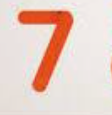

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The handwritten digit id recongnised as  7


In [59]:
input_image_path=input('Path of the image to be predicted: ')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
input_image_resize=cv2.resize(grayscale,(28,28))
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize,[1,28,28])
input_prediction=model.predict(input_image_resize.reshape(1,28,28))
input_pred_label=np.argmax(input_prediction)
print('The handwritten digit id recongnised as ',input_pred_label)